In [37]:
import pandas

Below are options to change the look of the graphs, and their size (to 15 by 5)

In [42]:
import matplotlib.pyplot as plt

pandas.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

/Users/okso/Documents/Repos/Python-Data-Training/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


As shown below, trying to read the bikes CSV file with the default options fails to work. 

In [25]:
pandas.read_csv('bikes.csv').head()

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


By passing the right options, we can get a clear dataset wich:
* is indexed on the Date for easier manipulation and resampling
* uses ';' as the column separator
* specifies that dates are in the European day-month-year instead of month-day-year as americans like to do

In [2]:
df = pandas.read_csv('bikes.csv', sep=';', parse_dates=['Date'], 
                     dayfirst=True, index_col='Date')
df.head(5)

,Berri 1,Br�beuf (donn�es non disponibles),C�te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donn�es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


The encoding issues cannot be resolved as no encoding we tried works, so we replace the column names with our own:

In [3]:
df.columns = ['Berri 1', 'Brébeuf (données non disponibles)',
       'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2', 'du Parc',
       'Pierre-Dupuy', 'Rachel1', 'St-Urbain (données non disponibles)']

In [26]:
df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Maisonneuve
Date,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,89
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,221
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,352
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,434
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,454
2012-01-06,146,NaN,0,98,244,86,4,75,NaN,342
2012-01-07,98,NaN,2,80,108,53,6,54,NaN,188
2012-01-08,95,NaN,1,62,98,64,11,63,NaN,160
2012-01-09,244,NaN,2,165,432,198,12,173,NaN,597


Resampling per month, here aggregating with a sum (an average would also make sense):

In [33]:
per_month = df.resample('M').sum()
per_month

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Maisonneuve
Date,,,,,,,,,,
2012-01-31,4915,NaN,38,3308,7737,3088,160,1140,NaN,11045
2012-02-29,6712,NaN,51,4573,10226,4852,240,73,NaN,14799
2012-03-31,26229,NaN,11388,18194,35736,21487,6634,26437,NaN,53930
2012-04-30,67699,NaN,29137,49312,85786,46048,16195,71759,NaN,135098
2012-05-31,133274,NaN,54360,94224,154609,78355,50130,129590,NaN,248833
2012-06-30,144849,NaN,58826,95213,169227,86190,53043,146530,NaN,264440
2012-07-31,162562,NaN,59657,101969,182673,88010,80033,150703,NaN,284642
2012-08-31,149227,NaN,61589,95110,168556,84261,57583,137377,NaN,263666
2012-09-30,127061,NaN,57986,83540,147277,86611,42328,123757,NaN,230817


In [28]:
# Make sure the graphs appear in Jupyter Notebook, else they might appear in a different window:
%matplotlib inline


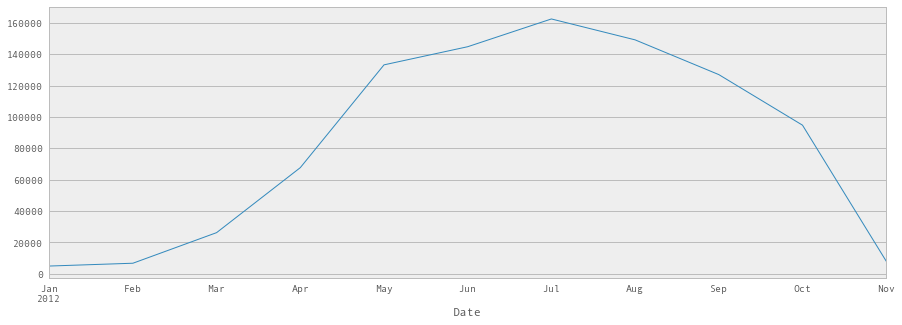

In [43]:
per_month['Berri 1'].plot()

We add a new column, based on two existing ones:

In [44]:
df['Maisonneuve'] = df['Maisonneuve 1'] + df['Maisonneuve 2']
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Maisonneuve
Date,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,89
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,221
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,352
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,434
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,454


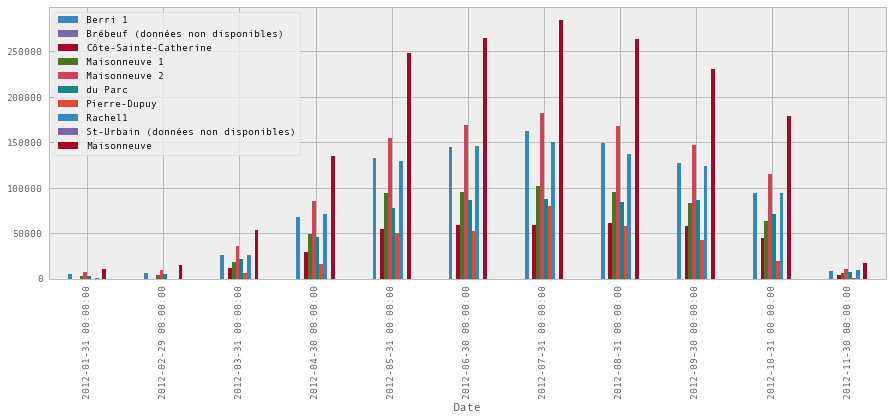

In [51]:
per_month.plot(kind='bar')

When doing exploration on a model, we can use the 'interact' widgets to manipulate data with sliders, selectors, ...

In [55]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [62]:
def print_square(number):
    print(number * number)

# if arguments are numbers, it shows a slider
interact(print_square, number=10.);

In [53]:
def f(kind):
    print(kind)

    per_month.plot(kind=kind)

<function __main__.f>

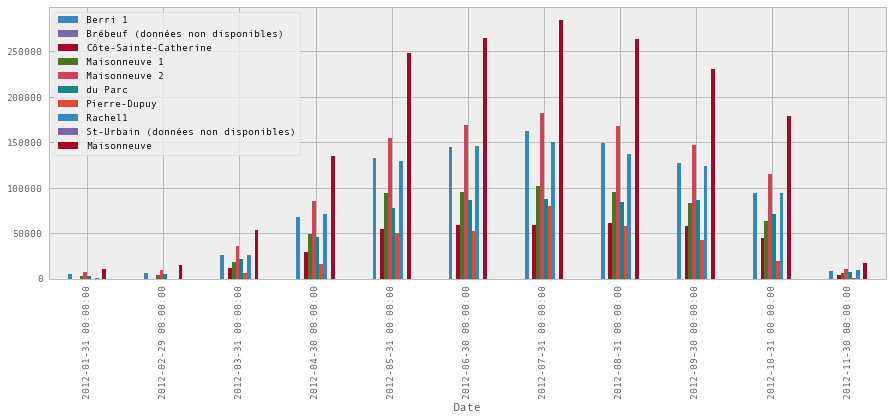

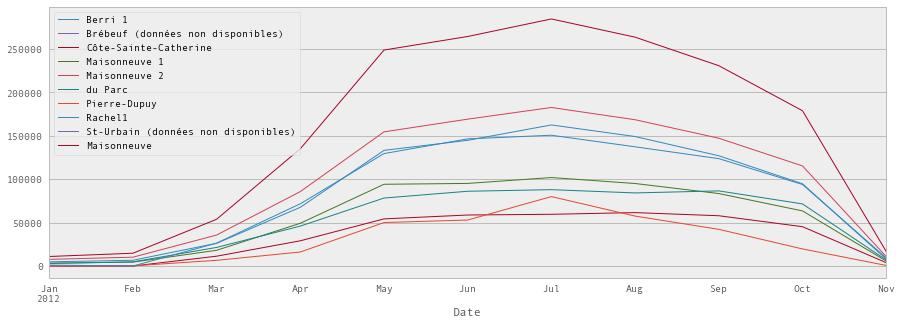

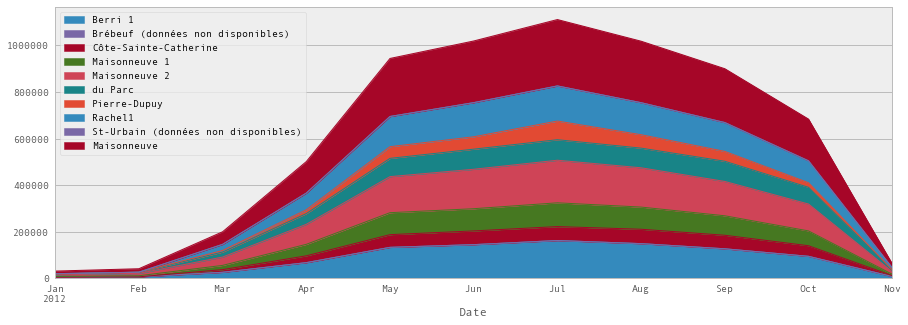

In [64]:
# if argument is a list, it shows a selector (second graph will appear below)
interact(f, kind=['bar', 'area', 'line'])

'Filters' can be generated using expressions, and later applied to filter rows from the dataframe:

In [16]:
per_month['Maisonneuve 1'] > 90000

Date
2012-01-31    False
2012-02-29    False
2012-03-31    False
2012-04-30    False
2012-05-31     True
2012-06-30     True
2012-07-31     True
2012-08-31     True
2012-09-30    False
2012-10-31    False
2012-11-30    False
Freq: M, Name: Maisonneuve 1, dtype: bool

In [68]:
# get rows where 'Maisonneuve 1' has a value of more than 9000
per_month[ per_month['Maisonneuve 1'] > 90000 ]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Maisonneuve,Maisonneuve 2000
Date,,,,,,,,,,,
2012-05-31,133274,NaN,54360,94224,154609,78355,50130,129590,NaN,248833,154609000
2012-06-30,144849,NaN,58826,95213,169227,86190,53043,146530,NaN,264440,169227000
2012-07-31,162562,NaN,59657,101969,182673,88010,80033,150703,NaN,284642,182673000
2012-08-31,149227,NaN,61589,95110,168556,84261,57583,137377,NaN,263666,168556000


We can also apply a custom function to all elements of a column, and store the result as a new column

In [66]:
col = per_month['Maisonneuve 2']

def multiply(x):
    # custom function
    return x  * 1000

per_month['Maisonneuve 2000'] = col.apply(multiply)
per_month

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Maisonneuve,Maisonneuve 2000
Date,,,,,,,,,,,
2012-01-31,4915,NaN,38,3308,7737,3088,160,1140,NaN,11045,7737000
2012-02-29,6712,NaN,51,4573,10226,4852,240,73,NaN,14799,10226000
2012-03-31,26229,NaN,11388,18194,35736,21487,6634,26437,NaN,53930,35736000
2012-04-30,67699,NaN,29137,49312,85786,46048,16195,71759,NaN,135098,85786000
2012-05-31,133274,NaN,54360,94224,154609,78355,50130,129590,NaN,248833,154609000
2012-06-30,144849,NaN,58826,95213,169227,86190,53043,146530,NaN,264440,169227000
2012-07-31,162562,NaN,59657,101969,182673,88010,80033,150703,NaN,284642,182673000
2012-08-31,149227,NaN,61589,95110,168556,84261,57583,137377,NaN,263666,168556000
2012-09-30,127061,NaN,57986,83540,147277,86611,42328,123757,NaN,230817,147277000


The `.apply` method can also be used on each column of the DataFrame:

In [69]:
def myfunction(col):
    return col.sum()

per_month.apply(myfunction)

Berri 1                                9.253650e+05
Brébeuf (données non disponibles)               NaN
Côte-Sainte-Catherine                  3.823390e+05
Maisonneuve 1                          6.148310e+05
Maisonneuve 2                          1.088181e+06
du Parc                                5.775250e+05
Pierre-Dupuy                           3.268350e+05
Rachel1                                8.907800e+05
St-Urbain (données non disponibles)             NaN
Maisonneuve                            1.703012e+06
Maisonneuve 2000                       1.088181e+09
dtype: float64

In [71]:
# similar to above, but using the 'lambda' notation:
per_month.apply(lambda col: col.sum())

Berri 1                                9.253650e+05
Brébeuf (données non disponibles)               NaN
Côte-Sainte-Catherine                  3.823390e+05
Maisonneuve 1                          6.148310e+05
Maisonneuve 2                          1.088181e+06
du Parc                                5.775250e+05
Pierre-Dupuy                           3.268350e+05
Rachel1                                8.907800e+05
St-Urbain (données non disponibles)             NaN
Maisonneuve                            1.703012e+06
Maisonneuve 2000                       1.088181e+09
dtype: float64